In [1]:
import corner
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from matplotlib import dates

%matplotlib inline

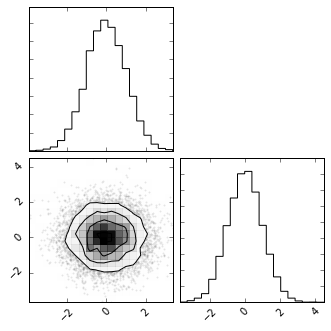

In [2]:
ndim, nsamples = 2, 10000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(samples)

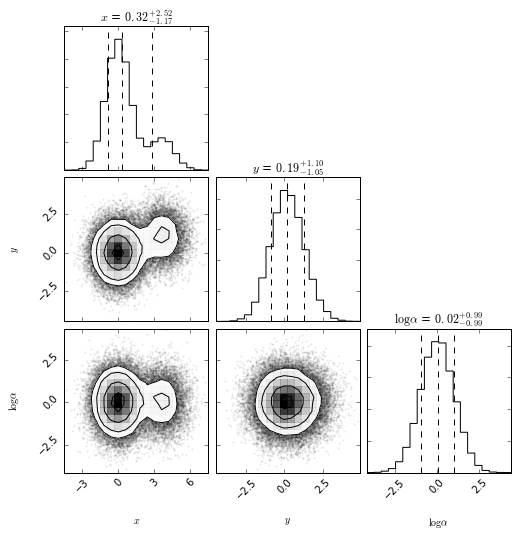

In [3]:
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape([4 * nsamples // 5, ndim])
data2 = (4*np.random.rand(ndim)[None, :] + np.random.randn(ndim * nsamples // 5).reshape([nsamples // 5, ndim]))
data = np.vstack([data1, data2])

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$", r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [4]:
import datetime

In [15]:
xs = np.atleast_1d(data)
xs = xs.T
len(xs)

3

In [16]:


K = len(xs)
factor = 2.0           # size of one side of one panel
lbdim = 0.5 * factor   # size of left/bottom margin
trdim = 0.2 * factor   # size of top/right margin
whspace = 0.05         # w/hspace size
plotdim = factor * K + factor * (K - 1.) * whspace
dim = lbdim + plotdim + trdim

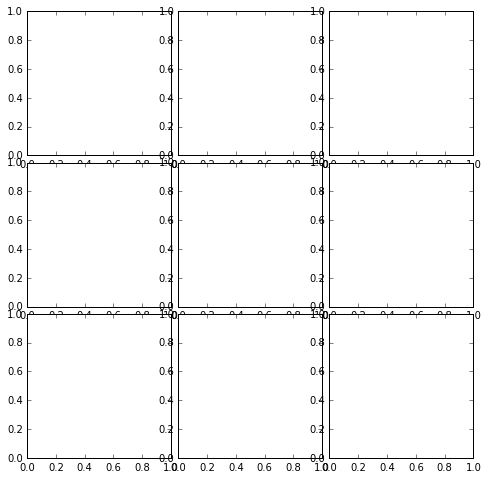

In [17]:
fig, axes = plt.subplots(K, K, figsize=(dim, dim))
lb = lbdim / dim
tr = (lbdim + plotdim) / dim
fig.subplots_adjust(left=lb, bottom=lb, right=tr, top=tr, wspace=whspace, hspace=whspace)

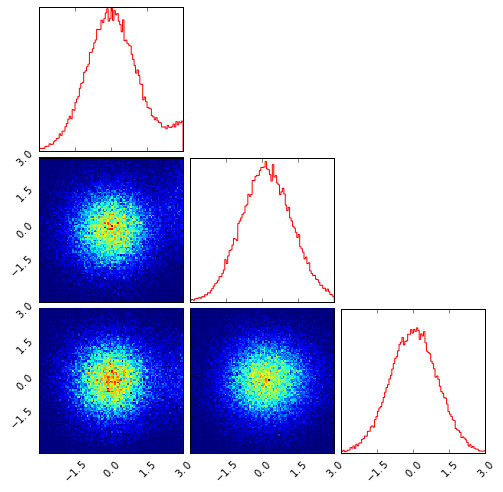

In [40]:
from matplotlib.ticker import MaxNLocator, NullLocator
from matplotlib.colors import LinearSegmentedColormap, colorConverter
from matplotlib.ticker import ScalarFormatter

fig, axes = plt.subplots(K, K, figsize=(dim, dim))
lb = lbdim / dim
tr = (lbdim + plotdim) / dim

max_n_ticks=5

fig.subplots_adjust(left=lb, bottom=lb, right=tr, top=tr, wspace=whspace, hspace=whspace)

hist_kwargs = dict()
hist_kwargs["color"]    = hist_kwargs.get("color", "red")
hist_kwargs["histtype"] = hist_kwargs.get("histtype", "step")

for i, x in enumerate(xs):
    ax = axes[i, i]
    n, _, _ = ax.hist(x, bins=100,range=[-3,3], **hist_kwargs)
    ax.set_xlim([-3,3])
    ax.set_yticklabels([])
    if max_n_ticks == 0:
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())
    else:
        ax.xaxis.set_major_locator(MaxNLocator(max_n_ticks, prune="lower"))
        ax.yaxis.set_major_locator(NullLocator())
    if i < K - 1:
        ax.set_xticklabels([])
    else:
        [l.set_rotation(45) for l in ax.get_xticklabels()]
        ax.xaxis.set_major_formatter( ScalarFormatter(useMathText=True))
    for j, y in enumerate(xs):
        ax = axes[i, j]
        if j > i:
            ax.set_frame_on(False)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        elif j == i:
            continue
        
        ax.hist2d(y, x, range=[[-3,3],[-3,3]], bins=[100,100])
        if max_n_ticks == 0:
            ax.xaxis.set_major_locator(NullLocator())
            ax.yaxis.set_major_locator(NullLocator())
        else:
            ax.xaxis.set_major_locator(MaxNLocator(max_n_ticks,prune="lower"))
            ax.yaxis.set_major_locator(MaxNLocator(max_n_ticks,prune="lower"))
            
        if i < K - 1:
            ax.set_xticklabels([])
        else:
            [l.set_rotation(45) for l in ax.get_xticklabels()]
            # use MathText for axes ticks
            ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        if j > 0:
            ax.set_yticklabels([])
        else:
            [l.set_rotation(45) for l in ax.get_yticklabels()]
            # use MathText for axes ticks
            ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

In [107]:
def sigma_(x, a, b, alpha=1.0):
    if a > b: 
        tmp = a
        a = b
        b = tmp
    fun = alpha*np.abs(x-b)*np.abs(x-a)
    if (x>=b) or (x<=a) :  return 0
#     fun[np.logical_or((x>=b),(x<=a))]=0
    return fun

# a = 1
# b = -1
# x  =  np.linspace(-5,5,200)
# plt.plot(x,sigma_(x,a,b))
# plt.show()

In [108]:
def step(x, a, b) :
    x += sigma_(x,a,b) * np.random.normal(0,x)
    return x

In [109]:
X = np.zeros(1000)

In [110]:
X = np.array([X[0] + sigma_(X[i],-1,1)*np.random.normal(0,0.5) for i in range(1,X.shape[0])])

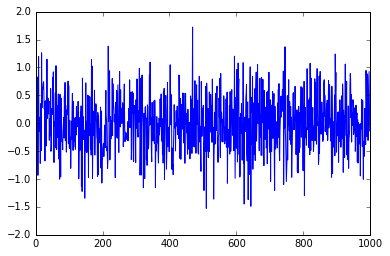

In [111]:
plt.plot(range(1000-1),X)

In [157]:
from scipy.special import logit

In [170]:
X = np.random.beta(1,8,5000)
Y = logit(X)

In [171]:
Y

array([-3.58711815, -0.77238098, -1.92954605, ..., -0.47552971,
       -3.36002811, -0.59458014])

In [172]:
from tools import kde


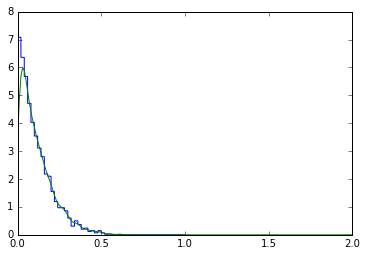

In [174]:
pdf_x = kde.gaussian_kde(X)

t = np.linspace(0,2,200)
plt.hist(X, bins=50, range=[0,1], histtype='step', normed=True)
plt.plot(t,pdf_x(t))

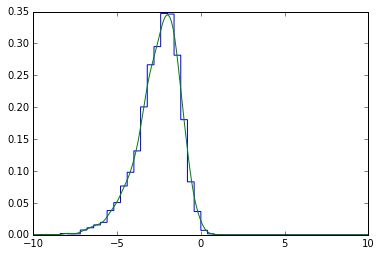

In [175]:
pdf_y = kde.gaussian_kde(Y)

t = np.linspace(-10,10,200)
plt.hist(Y, bins=50, range=[-10,10], histtype='step', normed=True)
plt.plot(t,pdf_y(t))

/home/user/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


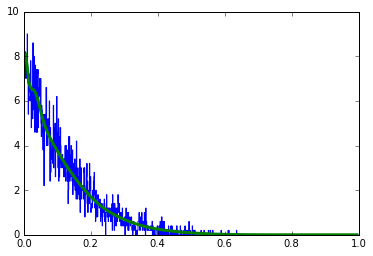

In [176]:
pdf_y = kde.gaussian_kde(Y)

t = np.linspace(0,1,200)
plt.hist(X, bins=1000, range=[0,1], histtype='step', normed=True)
plt.plot(t,pdf_y(logit(t))/(t*(1-t)), lw=3)